In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as sch
from sklearn.cluster import DBSCAN

In [3]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime_data.shape

(50, 5)

In [5]:
crime_data[crime_data.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [6]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
norm = MinMaxScaler()
crime_data_norm = norm.fit_transform(crime_data.iloc[:,1:])
crime_data_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

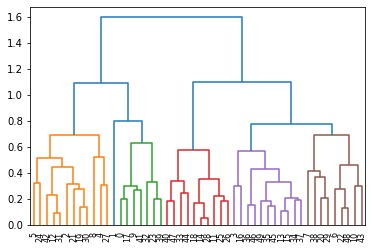

In [8]:
dendrogram = sch.dendrogram(sch.linkage(crime_data_norm,method='complete'),color_threshold=0.7,leaf_rotation=90)

In [9]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [10]:
y_hc = hc.fit_predict(crime_data_norm) 

In [11]:
y_hc_data = pd.DataFrame(y_hc)
y_hc_data.columns=(['Clusters'])

In [12]:
data_hc = pd.concat([crime_data,y_hc_data],join='outer',axis=1)
data_hc

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [13]:
data_hc.sort_values('Clusters')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
9,Georgia,17.4,211,60,25.8,0
1,Alaska,10.0,263,48,44.5,0
41,Tennessee,13.2,188,59,26.9,0
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1


## KMeans

In [14]:
crime_data_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(crime_data_norm)
    wcss.append(kmeans.inertia_)

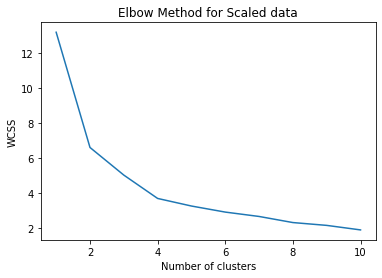

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Scaled data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crime_data_norm)

KMeans(n_clusters=4, random_state=0)

In [18]:
kmeans.inertia_

3.683456153585914

In [19]:
labels = kmeans.labels_

In [20]:
labels_crime_data = pd.DataFrame(labels) 
labels_crime_data.columns=(['Clusters'])

In [21]:
data_labeled = pd.concat([crime_data,labels_crime_data],join='outer',axis=1)
data_labeled.sort_values('Clusters')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
21,Michigan,12.1,255,74,35.1,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
19,Maryland,11.3,300,67,27.8,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
30,New Mexico,11.4,285,70,32.1,0
8,Florida,15.4,335,80,31.9,0
42,Texas,12.7,201,80,25.5,0
27,Nevada,12.2,252,81,46.0,0


## DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.3,min_samples=12)
dbscan.fit(crime_data_norm)

DBSCAN(eps=0.3, min_samples=12)

In [23]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0],
      dtype=int64)

In [24]:
dbscan_crime_data = pd.DataFrame(dbscan.labels_)
dbscan_crime_data.columns=(['Clusters'])

In [25]:
crime_data_dbscan = pd.concat([crime_data,dbscan_crime_data],join='outer',axis=1)
crime_data_dbscan.sort_values('Clusters')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,-1
27,Nevada,12.2,252,81,46.0,-1
29,New Jersey,7.4,159,89,18.8,-1
30,New Mexico,11.4,285,70,32.1,-1
31,New York,11.1,254,86,26.1,-1
32,North Carolina,13.0,337,45,16.1,-1
33,North Dakota,0.8,45,44,7.3,-1
34,Ohio,7.3,120,75,21.4,-1
36,Oregon,4.9,159,67,29.3,-1
23,Mississippi,16.1,259,44,17.1,-1
